In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your SQLite database
conn = sqlite3.connect("sales_data.db")  # Update path if needed


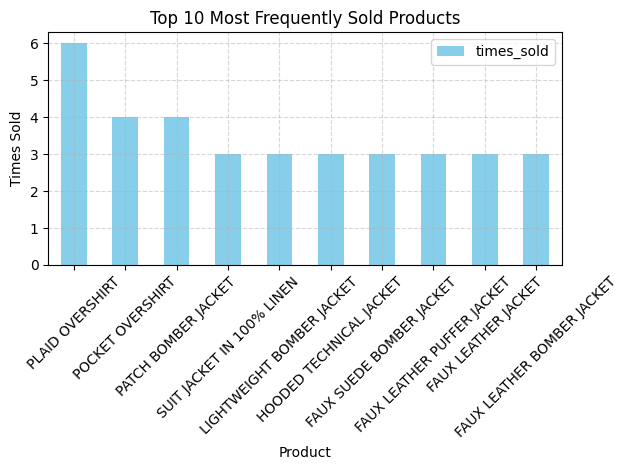

In [36]:

# Define the SQL query
query = """
SELECT product, COUNT(*) AS times_sold
FROM sales
GROUP BY product
ORDER BY times_sold DESC
LIMIT 10;
"""

# Run query and load results into DataFrame
df = pd.read_sql_query(query, conn)

# Plot the results
df.plot(kind='bar', x='product', y='times_sold', title='Top 10 Most Frequently Sold Products', color='skyblue')
plt.ylabel("Times Sold")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


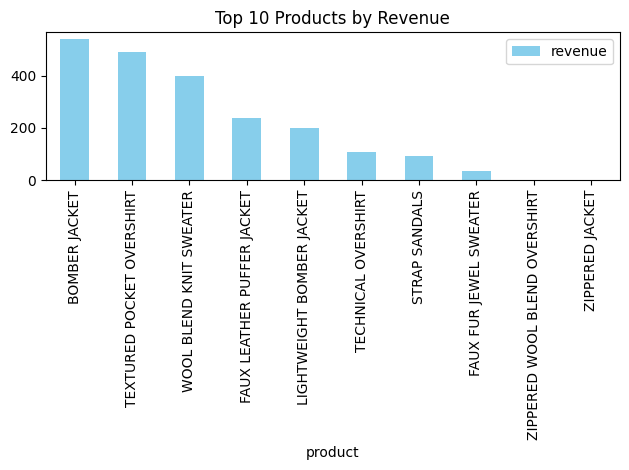

In [38]:
conn = sqlite3.connect("sales_data.db")

# 1. Top 10 Products by Revenue
query1 = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 10
"""

df_top_revenue.plot(kind='bar', x='product', y='revenue', color='skyblue', title="Top 10 Products by Revenue")
plt.tight_layout()
plt.savefig("top_revenue.png")
plt.show()


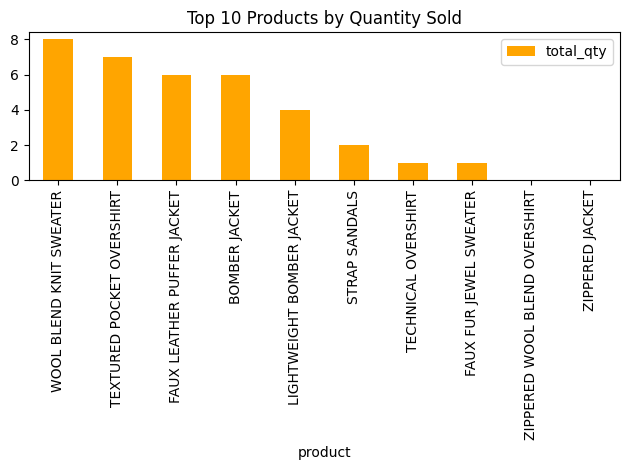

In [42]:
# 2. Top 10 Products by Quantity Sold
query2 = """
SELECT product,
       SUM(quantity) AS total_qty
FROM sales
GROUP BY product
ORDER BY total_qty DESC
LIMIT 10
"""


# Plot Quantity
df_top_quantity.plot(kind='bar', x='product', y='total_qty', color='orange', title="Top 10 Products by Quantity Sold")
plt.tight_layout()
plt.savefig("top_quantity.png")
plt.show()

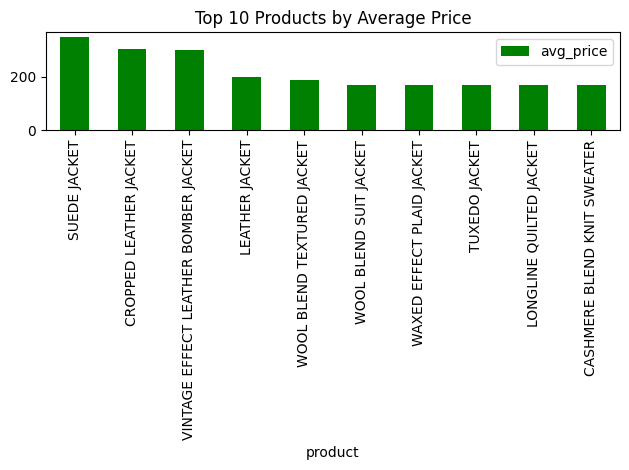

In [41]:

# 3. Average Price per Product
query3 = """
SELECT product,
       ROUND(AVG(price), 2) AS avg_price
FROM sales
GROUP BY product
ORDER BY avg_price DESC
LIMIT 10
"""


# Plot Average Price
df_avg_price.plot(kind='bar', x='product', y='avg_price', color='green', title="Top 10 Products by Average Price")
plt.tight_layout()
plt.savefig("avg_price.png")
plt.show()



📊 Top 10 Products by Revenue:

                         product  total_qty  revenue
0                  BOMBER JACKET        6.0    539.4
1      TEXTURED POCKET OVERSHIRT        7.0    489.3
2        WOOL BLEND KNIT SWEATER        8.0    399.2
3     FAUX LEATHER PUFFER JACKET        6.0    239.4
4      LIGHTWEIGHT BOMBER JACKET        4.0    199.6
5            TECHNICAL OVERSHIRT        1.0    109.0
6                  STRAP SANDALS        2.0     91.8
7         FAUX FUR JEWEL SWEATER        1.0     35.9
8  ZIPPERED WOOL BLEND OVERSHIRT        0.0      0.0
9                ZIPPERED JACKET        0.0      0.0


<Figure size 1000x600 with 0 Axes>

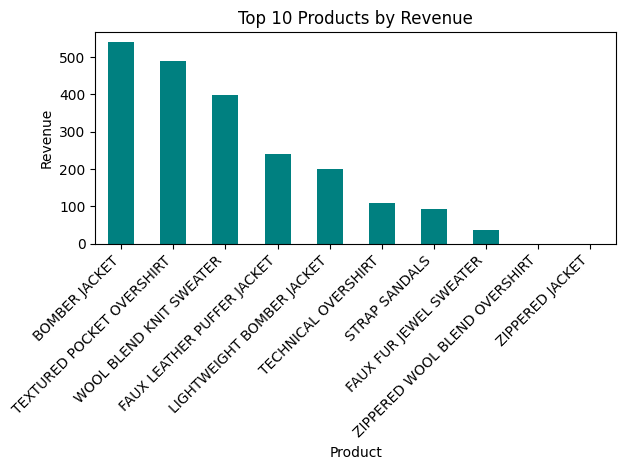

In [43]:
import matplotlib.pyplot as plt

# Reconnect to database
conn = sqlite3.connect("sales_data.db")

# SQL query to get top 10 products by revenue
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 10
"""

df_summary = pd.read_sql_query(query, conn)
conn.close()

# Show results
print("\n📊 Top 10 Products by Revenue:\n")
print(df_summary)

# Plot
plt.figure(figsize=(10, 6))
df_summary.plot(kind='bar', x='product', y='revenue', color='teal', legend=False)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
